<a href="https://colab.research.google.com/github/Viktoria574/ML/blob/main/Pract_2_TIMO_Polyakova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Технологии и инструментарий машинного обучения
#Практическая работа № 2
#Выполнила студентка группы ИНБО-05-22
#Полякова Виктория Владимировна

#Шаг 1:

Загрузка данных. Загрузите датасет, содержащий числовые признаки (например, Boston Housing, California Housing или другой подходящий из UCI или Kaggle). Импортируйте необходимые библиотеки для работы с данными, визуализацией и анализом. Загрузите данные в DataFrame и просмотрите первые строки, чтобы ознакомиться с набором данных.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Загрузка аднных
df, y = fetch_california_housing(return_X_y=True, as_frame=True)
df['MedHouseVal'] = y

# Шаг 1: просмотр первых строчек набора данных
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Шаг 2:
Исследование корреляций. Постройте корреляционную матрицу для числовых признаков. Визуализируйте корреляционную матрицу с помощью тепловой карты (heatmap). Определите пары признаков с наибольшей и наименьшей корреляцией. Для этого найдите максимальные и минимальные значения в корреляционной матрице, исключив диагональные элементы.

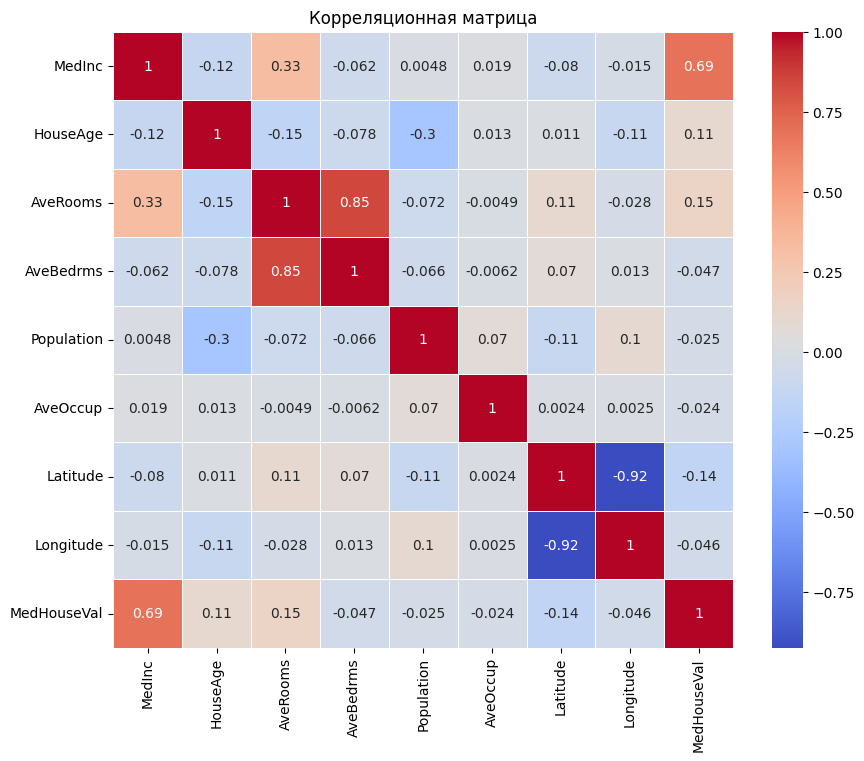

In [ ]:
# Шаг 2: Исследование корреляции

# Вычисление корреляционной матрицы
corr_matrix = df.corr()

# Построение heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

***Максимальное значение*** в корреляционной матрице между признаками ***AveBedrms*** и ***AveRooms***, что указывает на прямую зависимость между признаками и сильную корреляцию.

***Минимальное значение*** в корреляционной матрице между признаками ***Longitude*** и ***Latitude***, что указывает на обратную зависимость между признаками и сильную корреляцию.

#Шаг 3:
Построение графиков зависимостей. Выберите два признака с сильной корреляцией. Замените на реальные названия признаков из вашего датасета. Постройте диаграмму рассеяния (scatter plot) и добавьте линию регрессии.

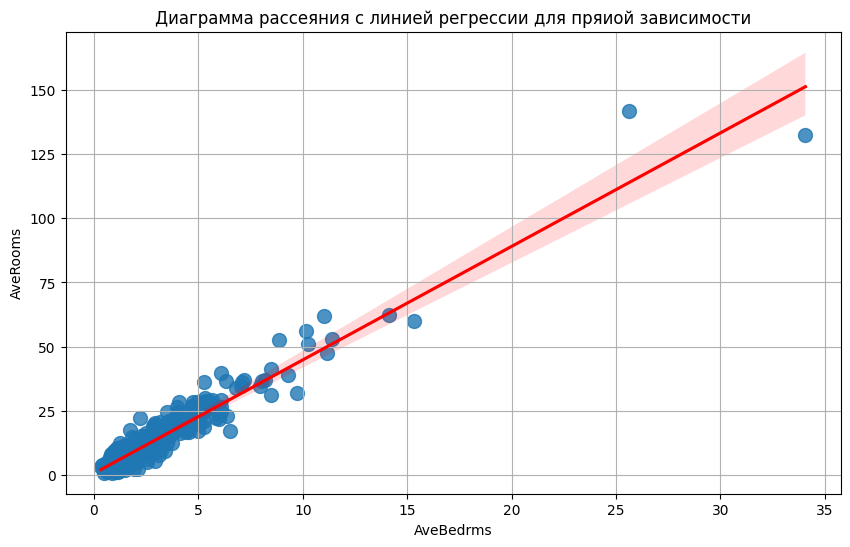

In [ ]:
# Шаг 3: Построение графиков зависимостей.

# Построение диаграмм рассеяния с линией регрессии

plt.figure(figsize=(10, 6))
sns.regplot(x=df['AveBedrms'], y=df['AveRooms'], scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title('Диаграмма рассеяния с линией регрессии для пряиой зависимости')
plt.xlabel('AveBedrms')
plt.ylabel('AveRooms')
plt.grid(True)
plt.show()

#Шаг 4:
Подготовка данных. Нормализуйте данные, чтобы привести все
признаки к одному масштабу, используя стандартное масштабирование. Разделите данные на обучающую и тестовую выборки в пропорции 80/20.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Шаг 4: Подготовка данных.

# Нормализация для Min-Max Scaling
scaler = MinMaxScaler()
df_scaled =  pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638


In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки в пропорции 80/20
X = df_scaled[['AveBedrms']]
y = df_scaled['AveRooms']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Шаг 5:
 Визуализация трендов. Используйте модель линейной регрессии для предсказания и постройте график распределения ошибок между предсказанными и реальными значениями. Постройте график ошибок (выбросов), чтобы оценить точность модели.

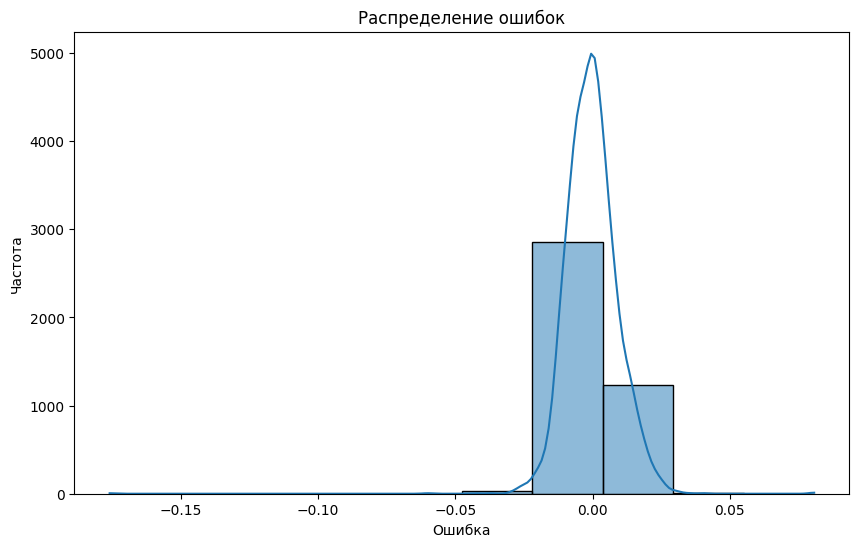

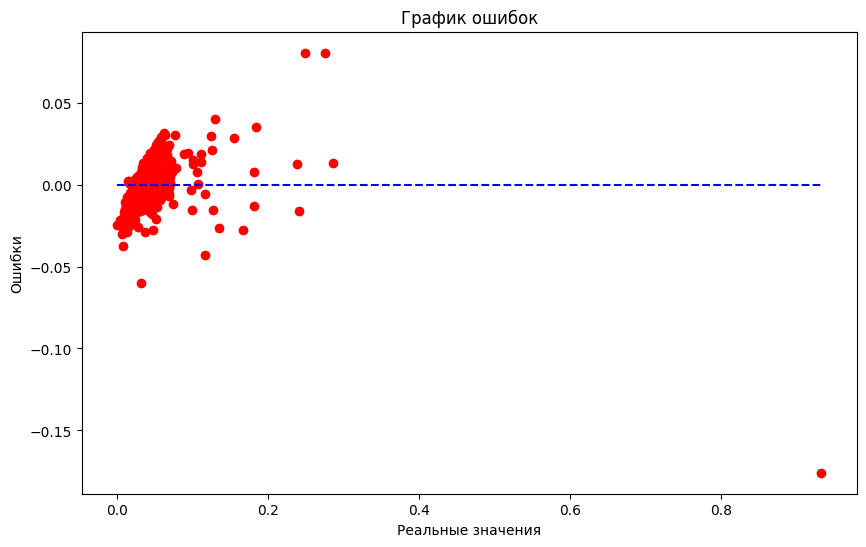

Среднеквадратичная ошибка (MSE): 9.028086817838633e-05


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Вычисление ошибок
errors = y_test - y_pred

# Построение графика распределения ошибок
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=10)
plt.title('Распределение ошибок')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.show()

# Построение графика ошибок (выбросов)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, color='red')
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='blue', linestyles='dashed')
plt.title('График ошибок')
plt.xlabel('Реальные значения')
plt.ylabel('Ошибки')
plt.show()

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse}')

#Шаг 6: Ответьте на вопросы.
 Как изменение одного признака влияет на другой?

***Ответ:***

 Если между признаками есть сильная корреляция, то они могут иметь тесную взаимосвязь, к примеру, при увелечении значения одного признака другой признак тоже увеличивается.

 Как влияет масштабирование данных на качество модели?

 ***Ответ:***

 Масштабирование данных помогает улучшить качество модели и повысить производительность алгоритма, благодаря приведению признаков к одному масштабу.

In [ ]:
# Линейная регрессия
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

x = np.array([12, 45, 3, 27, 8, 19, 34, 56, 2, 11, 40, 7, 23, 48, 15, 30, 9, 21, 37, 50, 6, 18, 33, 47]).reshape(-1, 1)
y_true = np.array([20, 4, 31, 26, 10, 22, 38, 52, 1, 17, 41, 5, 24, 49, 16, 32, 8, 28, 35, 51, 7, 13, 39, 46])

# Разделение данных на обучающую и тестовую выборки в пропорции 80/20-----------
X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Вычисление метрик

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred))) * 100
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape}%")

# R-squared (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 55.75652841190703
Mean Absolute Error (MAE): 6.168705538195597
Mean Absolute Percentage Error (MAPE): 273.07646480572134%
Symmetric Mean Absolute Percentage Error (SMAPE): 69.18043516257974%
R-squared (R^2): 0.6345272128217946


In [ ]:
import numpy as np

# Пример данных
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Вычисление метрик

# Loss function (Mean Squared Error)
mse = np.mean((y_true - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_true - y_pred))
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape}%")

# R-squared (R^2)
ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
ss_res = np.sum((y_true - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 0.375
Mean Absolute Error (MAE): 0.5
Mean Absolute Percentage Error (MAPE): 32.73809523809524%
Symmetric Mean Absolute Percentage Error (SMAPE): 57.878787878787875%
R-squared (R^2): 0.9486081370449679


In [ ]:
# Вычисление коэффициентов прямой-----------------------------------------------
# Данные
X = np.array([1, 2, 3, 4])
Y = np.array([1, 2, 3, 4])

# Линейная регрессия
coefficients = np.polyfit(X, Y, 1)  # Степень 1 для линейной регрессии
slope, intercept = coefficients

# Округление коэффициентов
slope = round(slope, 2)
intercept = round(intercept, 2)

print("Наклон (slope):", slope)
print("Смещение (intercept):", intercept)

Наклон (slope): 1.0
Смещение (intercept): -0.0


In [ ]:
# Полиноминальная

data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [2, 3, 4, 5, 6],
    'feature3': [3, 4, 5, 6, 7],
    'target': [2, 3, 5, 7, 11]
}
df = pd.DataFrame(data)

# Разделение данных на признаки и целевую переменную
X = df[['feature1', 'feature2', 'feature3']]
y = df['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
arr = np.array([20, 4, 31, 26, 10, 22, 38, 52, 1, 17, 41, 5, 24, 49, 16, 32, 8, 28, 35, 51, 7, 13, 39, 46])
print(np.mean(y_true))
print("Медиана массива:",np.median(arr))
# Вычисление дисперсии
variance = np.var(arr)

print("Дисперсия массива:", variance)
from scipy import stats
# Пример использования:
arr = np.array([1, 2, 3, 2, 4, 1, 2, 3])
print("Мода:", stats.mode(arr))

25.625
Медиана массива: 25.0
Дисперсия массива: 241.984375
Мода: ModeResult(mode=2, count=3)


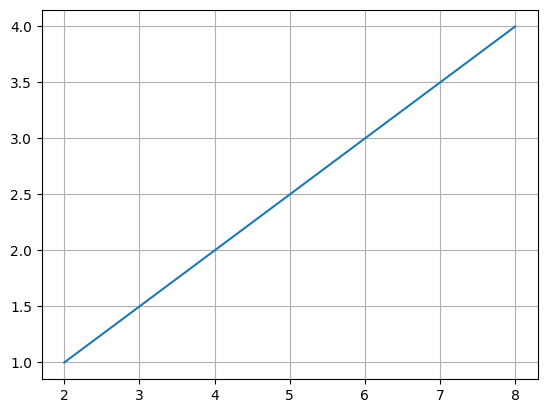

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

x = np.array([2, 4, 6, 8]).reshape(-1, 1)
y = np.array([1,2, 3,4])

# Создание модели логистической регрессии
log_reg = LinearRegression()

# Поиск по сетке

log_reg.fit(x, y)

y_pred = log_reg.predict(x)
plt.plot(x, y_pred)
plt.grid()
plt.show()
# Ответ: 2.5

In [ ]:
#Наивный байес
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Пример данных (например, данные об ирисах)
from sklearn.datasets import load_iris

# Загрузка данных
data = load_iris()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели наивного байесовского классификатора
model = GaussianNB()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy * 100:.2f}%")

# Пример предсказания для нового образца
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])
predicted_class = model.predict(new_sample)
print(f"Предсказанный класс для нового образца: {predicted_class[0]}")

Точность модели: 97.78%
Предсказанный класс для нового образца: 0


Коэффициенты гиперплоскости: [[ 2.20441791 -0.63877828]]
Свободный член (intercept): [0.15548335]


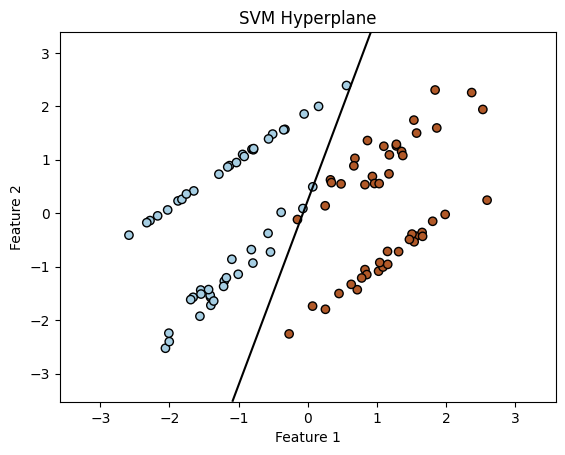

In [ ]:
#SVM

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Генерация синтетических данных для классификации
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели SVM
model = SVC(kernel='linear')  # Используем линейное ядро для простоты
model.fit(X_train, y_train)

# Получение коэффициентов гиперплоскости
coef = model.coef_
intercept = model.intercept_

print(f"Коэффициенты гиперплоскости: {coef}")
print(f"Свободный член (intercept): {intercept}")

# Визуализация гиперплоскости
import matplotlib.pyplot as plt

# Функция для отображения гиперплоскости
def plot_hyperplane(model, X, y):
    # Получение коэффициентов и свободного члена
    w = model.coef_[0]
    b = model.intercept_[0]

    # Создание сетки для отображения гиперплоскости
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Вычисление значений гиперплоскости
    Z = w[0] * xx + w[1] * yy + b

    # Отображение гиперплоскости
    plt.contour(xx, yy, Z, levels=[0], colors='k')

    # Отображение данных
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Hyperplane')
    plt.show()

# Отображение гиперплоскости
plot_hyperplane(model, X, y)

In [ ]:
import numpy as np

def euclidean_distance(A, B):
    return np.sqrt(np.sum((A - B) ** 2))

def manhattan_distance(A, B):
    return np.sum(np.abs(A - B))

def chebyshev_distance(A, B):
    return np.max(np.abs(A - B))

def minkowski_distance(A, B, p):
    return np.sum(np.abs(A - B) ** p) ** (1 / p)

# Пример точек
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

# Вычисление расстояний
euclidean_dist = euclidean_distance(A, B)
manhattan_dist = manhattan_distance(A, B)
chebyshev_dist = chebyshev_distance(A, B)
minkowski_dist = minkowski_distance(A, B, p=3)  # Пример для p=3

print(f"Евклидово расстояние: {euclidean_dist}")
print(f"Манхэттенское расстояние: {manhattan_dist}")
print(f"Расстояние Чебышева: {chebyshev_dist}")
print(f"Степенное расстояние (Минковского) для p=3: {minkowski_dist}")

Евклидово расстояние: 5.196152422706632
Манхэттенское расстояние: 9
Расстояние Чебышева: 3
Степенное расстояние (Минковского) для p=3: 4.3267487109222245


In [ ]:
import numpy as np

def cosine_similarity(A, B):
    # Вычисление скалярного произведения
    dot_product = np.dot(A, B)

    # Вычисление норм векторов
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)

    # Вычисление косинусного сходства
    similarity = dot_product / (norm_A * norm_B)

    return similarity

# Пример векторов
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

# Вычисление косинусного сходства
similarity = cosine_similarity(A, B)
print(f"Косинусное сходство: {similarity}")

Косинусное сходство: 0.9746318461970762
